In [93]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [94]:
plt.style.use("dark_background")

In [95]:
### Upload data

In [96]:
houston_data = pd.read_csv('C:\\Users\\corey\\Desktop\\git\\portfolio\\data_portfolio\\realestate_ml\\data\\houston_houses.csv')

In [97]:
houston_data.head()

,Unnamed: 0,bedrooms,Sqft.,lot Sqft.,full baths,half baths,stories,year built,Private Pool,Acres,zip,price,long,lat
0,"4830 Tain Drive Houston, TX 77084",3.0,1758.0,7150.0,2.0,0,1.0,1978.0,False,NaN,77084,221000.0,-95.652124,29.846731
1,"11906 Glenway Drive Houston, TX 77070",4.0,2958.0,9400.0,3.0,1,2.0,1980.0,False,NaN,77070,359500.0,-95.603209,29.981791
2,"1032 Alexander Street Houston, TX 77008",3.0,1120.0,6000.0,2.0,0,1.0,1936.0,False,NaN,77008,825000.0,-95.407932,29.789353
3,"7638 Ashton Drive Houston, TX 77095",3.0,1714.0,5500.0,2.0,0,1.0,1986.0,False,NaN,77095,289995.0,-95.662173,29.896486
4,"5220 Antha Street Houston, TX 77016",0.0,1470.0,4895.0,0.0,0,1.0,1977.0,False,NaN,77016,280000.0,-95.316054,29.849447


In [98]:
houston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39005 entries, 0 to 39004
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    39005 non-null  object 
 1   bedrooms      39005 non-null  float64
 2   Sqft.         39005 non-null  float64
 3   lot Sqft.     39005 non-null  float64
 4   full baths    39005 non-null  float64
 5   half baths    39005 non-null  int64  
 6   stories       39005 non-null  float64
 7   year built    32422 non-null  float64
 8   Private Pool  39005 non-null  bool   
 9   Acres         6023 non-null   float64
 10  zip           39005 non-null  object 
 11  price         39005 non-null  float64
 12  long          23645 non-null  float64
 13  lat           23645 non-null  float64
dtypes: bool(1), float64(10), int64(1), object(2)
memory usage: 3.9+ MB


In [99]:
houston_data.describe()

,bedrooms,Sqft.,lot Sqft.,full baths,half baths,stories,year built,Acres,price,long,lat
count,39005.000000,3.900500e+04,3.900500e+04,39005.000000,39005.000000,39005.000000,3.242200e+04,6023.000000,3.900500e+04,23645.000000,23645.000000
mean,2.931214,2.350720e+03,1.050663e+04,1.994821,0.423741,1.605049,3.227100e+03,22.059372,5.066283e+05,-95.485458,29.837295
std,1.554800,5.784915e+04,4.179896e+04,1.180345,0.546580,21.658795,1.556813e+05,614.587994,7.352763e+05,0.516037,0.404459
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000e+00,-102.313998,28.875099
25%,3.000000,1.344000e+03,0.000000e+00,2.000000,0.000000,1.000000,1.984000e+03,1.300000,2.649850e+05,-95.605023,29.659383
50%,3.000000,1.986000e+03,6.181000e+03,2.000000,0.000000,1.000000,2.012000e+03,2.600000,3.649900e+05,-95.443525,29.791258
75%,4.000000,2.676000e+03,8.855000e+03,3.000000,1.000000,2.000000,2.022000e+03,8.200000,5.281400e+05,-95.258787,30.013098
max,11.000000,1.140106e+07,1.441410e+06,9.000000,9.000000,3306.000000,1.990202e+07,46174.000000,2.650000e+07,-93.414739,34.260895


## Data Anomalies
### This section highlights and justifies various data anomalies then removes the associated rows


In [100]:
zip_counts = houston_data['zip'].value_counts()
#print(zip_counts[zip_counts < 10])
low_zip_counts = zip_counts[zip_counts < 10].reset_index()['index'].values
print(f'Number of zip codes with fewer than 10 instances: {len(low_zip_counts)}')

Number of zip codes with fewer than 10 instances: 50


In [101]:
years_after_22 = houston_data.loc[houston_data['year built'] > 2022]
year_0 = houston_data.loc[houston_data['year built'] == 0] + houston_data.loc[houston_data['year built'].isna()]
year_0_with_bedrooms = year_0.loc[year_0['bedrooms'] > 0]

print(f'Number of homes with "year built" after 2022: {len(years_after_22)}')
print(f'Number of homes with "year built" as NaN or 0: {len(year_0)}')
print(f'Number of homes with a "year built" as NaN or 0 and "bedrooms" > 0: {len(year_0_with_bedrooms)}')

Number of homes with "year built" after 2022: 406
Number of homes with "year built" as NaN or 0: 6599
Number of homes with a "year built" as NaN or 0 and "bedrooms" > 0: 0


In [102]:
mislabeledHomes1 = houston_data.loc[houston_data['Sqft.'] > 0].loc[houston_data['bedrooms'] == 0]['Unnamed: 0'].values
print(f'Number of homes that list a sqare footage but have zero bedrooms: {len(mislabeledHomes1)}')

mislabeledHomes2 = houston_data.loc[houston_data['Sqft.'] == 0].loc[houston_data['bedrooms'] > 0]['Unnamed: 0'].values
print(f'Number of homes that list zero sqare footage but bedrooms: {len(mislabeledHomes2)}')

Number of homes that list a sqare footage but have zero bedrooms: 558
Number of homes that list zero sqare footage but bedrooms: 133


In [103]:
story_error = houston_data.loc[houston_data['stories'] > 5]
print(f'Number of homes with stories greater than 5: {len(story_error)}')

Number of homes with stories greater than 5: 10


In [104]:
full_baths = houston_data.loc[houston_data['full baths'] >= 6]
half_baths = houston_data.loc[houston_data['half baths'] >= 3]
print(f'Percentage of homes with 6 or more full baths: {len(full_baths)/len(houston_data)*100}')
print(f'Percentage of homes with 3 or more half baths: {len(half_baths)/len(houston_data)*100}')

Percentage of homes with 6 or more full baths: 0.5024996795282656
Percentage of homes with 3 or more half baths: 0.2486860658889886


In [105]:
# Drop Acres column
houston_data = houston_data.drop(['Acres'], axis=1)

# Drop long lat columns
houston_data = houston_data.drop(['long', 'lat'], axis=1)

# Drop rows where zip code is in low_zip_counts
houston_data = houston_data[~houston_data['zip'].isin(low_zip_counts)]

# Drop rows where "year built" is greater than 2022
houston_data = houston_data[houston_data["year built"] <= 2022]

# Convert rows where "year built" equals NaN to 0
houston_data['year built'] = houston_data['year built'].fillna(0)

# Drop rows where Sqft/bedrooms are mislabeled
houston_data = houston_data.loc[~houston_data['Unnamed: 0'].isin(mislabeledHomes1)]
houston_data = houston_data.loc[~houston_data['Unnamed: 0'].isin(mislabeledHomes2)]

# Drop rows where stories are mislabeled
houston_data = houston_data.loc[houston_data['stories'] < 6]

# Drop rows where number of full and half baths are greater than 5 and 2 respectively
houston_data = houston_data.loc[houston_data['full baths'] <= 5]
houston_data = houston_data.loc[houston_data['half baths'] <= 2]

# Remove lots
houston_data = houston_data.loc[houston_data['bedrooms'] > 0]
houston_data = houston_data.loc[houston_data['full baths'] > 0]

# Finally, drop home address
houston_data = houston_data.drop(['Unnamed: 0'], axis=1)

## Final Data

In [106]:
houston_data.head()

,bedrooms,Sqft.,lot Sqft.,full baths,half baths,stories,year built,Private Pool,zip,price
0,3.0,1758.0,7150.0,2.0,0,1.0,1978.0,False,77084,221000.0
1,4.0,2958.0,9400.0,3.0,1,2.0,1980.0,False,77070,359500.0
2,3.0,1120.0,6000.0,2.0,0,1.0,1936.0,False,77008,825000.0
3,3.0,1714.0,5500.0,2.0,0,1.0,1986.0,False,77095,289995.0
5,2.0,1180.0,6960.0,1.0,0,1.0,1955.0,False,77033,128000.0


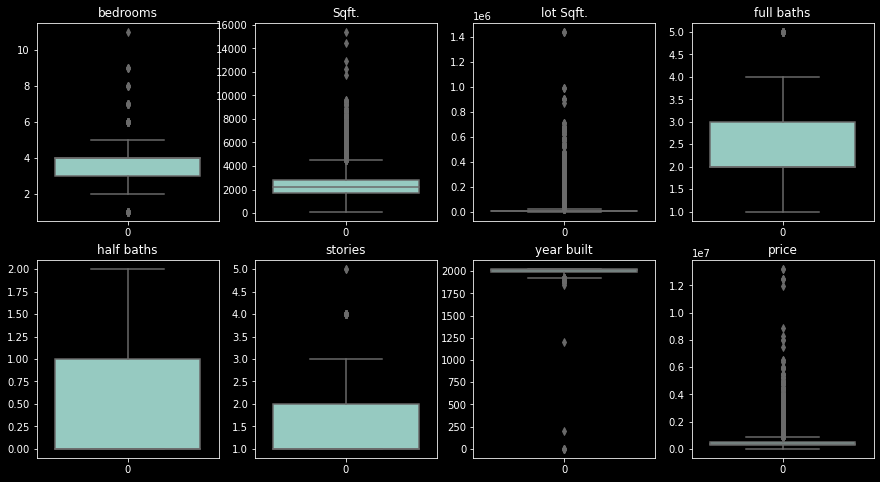

In [107]:
houston_data.columns
num_cols = ['bedrooms', 'Sqft.', 'lot Sqft.', 'full baths','half baths', 'stories', 'year built', 'price']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for feat, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(data=houston_data[feat], orient='v', ax=ax).set_title(feat)

In [108]:
PATH = 'C:\\Users\\corey\\Desktop\\git\\portfolio\\data_portfolio\\realestate_ml\\data\\houston_houses_cleaned.csv'
houston_data.to_csv(PATH)